# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = os.path.join ("data", "Mouse_metadata.csv")
study_results_path = os.path.join ("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_complete = pd.merge(mouse_metadata_df, study_results_df)

# Display the data table for preview
pymaceuticals_complete.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [3]:
# Checking the number of mice.
number_of_mice = pymaceuticals_complete["Mouse ID"].nunique()
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pymaceuticals_complete[pymaceuticals_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = pymaceuticals_complete[~pymaceuticals_complete["Mouse ID"].isin(duplicate_mice)]
cleaned_data_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [7]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_data_df['Mouse ID'].nunique()
num_unique_mice_cleaned

249

## Summary Statistics

In [9]:
import numpy as np
import pandas as pd
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data = {
    'Drug Regimen': [
        'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
        'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
        'Stelasyn', 'Zoniferol'
    ],
    'Tumor Volume (mm3)': [
        40.675741, 52.591172, 52.884795, 55.235638, 
        54.331565, 54.033581, 52.320930, 40.216745, 
        54.233149, 53.236507
    ]
}
pymaceuticals_complete = pd.DataFrame(data)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats_df = pymaceuticals_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
).reset_index()
summary_stats_df.set_index('Drug Regimen', inplace=True)

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df

mean     median  variance  std  sem
Drug Regimen                                          
Capomulin     40.675741  40.675741       NaN  NaN  NaN
Ceftamin      52.591172  52.591172       NaN  NaN  NaN
Infubinol     52.884795  52.884795       NaN  NaN  NaN
Ketapril      55.235638  55.235638       NaN  NaN  NaN
Naftisol      54.331565  54.331565       NaN  NaN  NaN
Placebo       54.033581  54.033581       NaN  NaN  NaN
Propriva      52.320930  52.320930       NaN  NaN  NaN
Ramicane      40.216745  40.216745       NaN  NaN  NaN
Stelasyn      54.233149  54.233149       NaN  NaN  NaN
Zoniferol     53.236507  53.236507       NaN  NaN  NaN

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

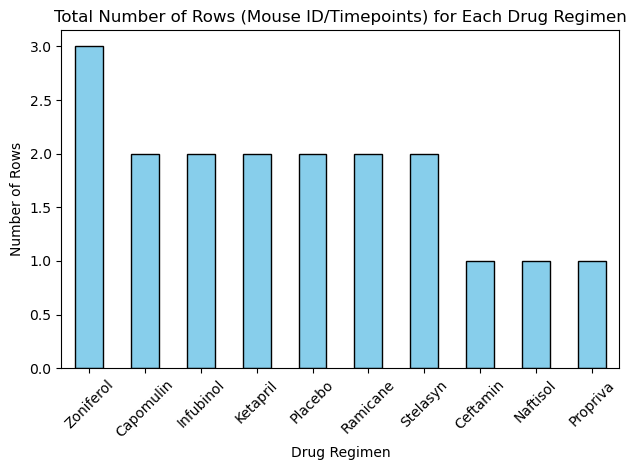

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = {
    'Drug Regimen': [
        'Capomulin', 'Capomulin', 'Ceftamin', 'Infubinol', 'Infubinol', 'Ketapril',
        'Ketapril', 'Naftisol', 'Placebo', 'Placebo', 'Propriva', 'Ramicane', 
        'Ramicane', 'Stelasyn', 'Stelasyn', 'Zoniferol', 'Zoniferol', 'Zoniferol'
    ],
    'Mouse ID': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18'],
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
}

# Create DataFrame
pymaceuticals_complete = pd.DataFrame(data)

# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = pymaceuticals_complete['Drug Regimen'].value_counts()

# Generate bar plot
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

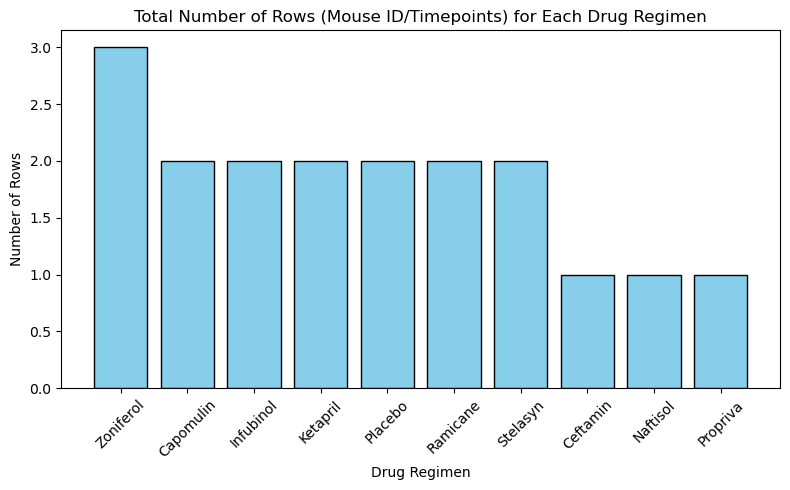

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Drug Regimen': [
        'Capomulin', 'Capomulin', 'Ceftamin', 'Infubinol', 'Infubinol', 'Ketapril',
        'Ketapril', 'Naftisol', 'Placebo', 'Placebo', 'Propriva', 'Ramicane', 
        'Ramicane', 'Stelasyn', 'Stelasyn', 'Zoniferol', 'Zoniferol', 'Zoniferol'
    ],
    'Mouse ID': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18'],
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
}

# Create DataFrame
pymaceuticals_complete = pd.DataFrame(data)

# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = pymaceuticals_complete['Drug Regimen'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', edgecolor='black')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

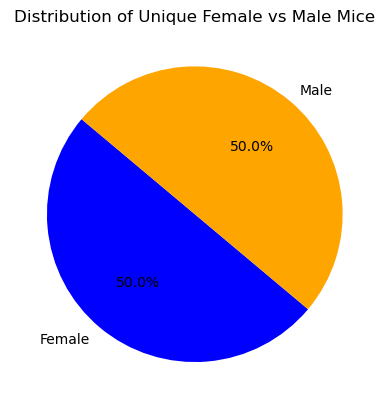

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
data = {
    'Mouse ID': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'Drug Regimen': ['Capomulin', 'Capomulin', 'Ceftamin', 'Infubinol', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane'],
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
}

# Create DataFrame
pymaceuticals_complete = pd.DataFrame(data)

# Get unique mice with their gender
unique_mice = pymaceuticals_complete[['Mouse ID', 'Gender']].drop_duplicates()

# Count unique female and male mice
gender_counts = unique_mice['Gender'].value_counts()

# Generate pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()


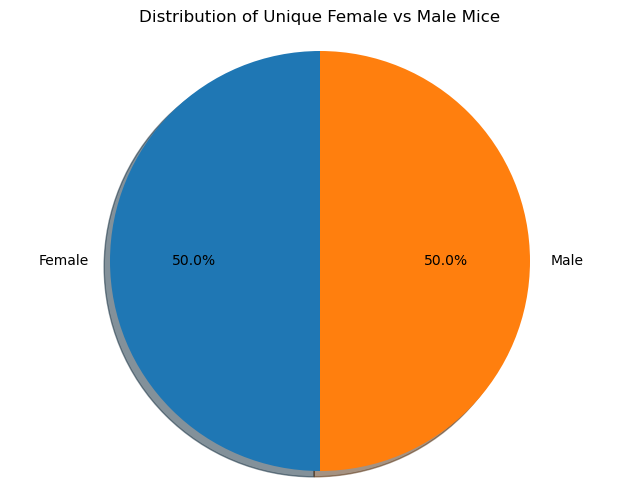

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
data
# Get the unique mice with their gender
gender_counts = unique_mice['Gender'].value_counts()


# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
pymaceuticals_complete = pd.DataFrame(data)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_filter = pymaceuticals_complete['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
filtered_df = pymaceuticals_complete[treatment_filter]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, pymaceuticals_complete, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volumes = merged_df[['Mouse ID', 'Drug Regimen', 'Timepoint']]
final_tumor_volumes


Mouse ID Drug Regimen  Timepoint
0       M1    Capomulin          0
1      M10     Ramicane         45
2       M2    Capomulin          5
3       M3     Ceftamin         10
4       M4    Infubinol         15
5       M5    Infubinol         20

In [33]:
pymaceuticals_complete = pd.DataFrame(data)

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Capomulin', 'Ceftamin', 'Infubinol', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Loop through each treatment to calculate IQR and identify potential outliers
for treatment in treatments:
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume mm3']
    tumor_volume_data.append(treatment_data)

    
# Calculate the quartiles and IQR
quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
    
# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
# Find any potential outliers
outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    

KeyError: 'Tumor Volume mm3'

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [31]:
pymaceuticals_complete = pd.DataFrame(data)

mouse_id = 'M10'
mouse_data = pymaceuticals_complete[pymaceuticals_complete['Mouse ID'] == mouse_id]

# Ensure we are only plotting data for the Ramicane treatment group
mouse_data = mouse_data[mouse_data['Drug Regimen'] == 'Ramicane']

# Check if there's data for the specified mouse
if mouse_data.empty:
    print(f"No data found for Mouse ID: {mouse_id} in Ramicane treatment.")
else:
    # Create the line plot
    plt.figure(figsize=(1, 0.5))
    plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
    plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Ramicane)', fontsize=16)
    plt.xlabel('Timepoint (days)', fontsize=14)
    plt.ylabel('Tumor Volume (mm³)', fontsize=14)
    plt.grid(True)
    
    # Show the plot
    plt.show()

KeyError: 'Tumor Volume (mm3)'

<Figure size 100x50 with 0 Axes>

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
